<a href="https://colab.research.google.com/github/MALLI7622/Deep-Learning-with-PyTorch/blob/master/PyTorchCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import torchvision
import torchvision.transforms as transforms
trainset = torchvision.datasets.CIFAR10(root = "./data", train = True, 
                                    download = True,
                                    transform = transforms.ToTensor())


Extracting ./data/cifar-10-python.tar.gz to ./data


In [ ]:
classes = ("plane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")

In [ ]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 128, shuffle = True)

In [ ]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)
print(images[0].shape)
print(labels[0].item())

torch.Size([128, 3, 32, 32])
torch.Size([3, 32, 32])
2


In [ ]:
img = images[0]
print(type(img))

<class 'torch.Tensor'>


In [ ]:
npimg = img.numpy()
print(type(npimg))
print(npimg.shape)

<class 'numpy.ndarray'>
(3, 32, 32)


In [ ]:
npimg = np.transpose(npimg, (1, 2, 0))
print(npimg.shape)

(32, 32, 3)


1


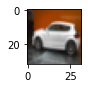

In [ ]:
print(labels[0].item())
plt.figure(figsize = (1, 1))
plt.imshow(npimg)
plt.show()

In [ ]:
def imshow(img):
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
  plt.show()

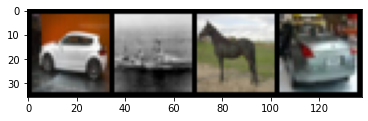

car, ship, horse, car


In [ ]:
imshow(torchvision.utils.make_grid(images))
print(', '.join(classes[labels[j]] for j in range(4)))

In [ ]:
import torch.nn as nn

class FirstCNN(nn.Module):
  def __init__(self):
    super(FirstCNN, self).__init__()
    self.conv1 = nn.Conv2d(3, 16, 3, padding = (1, 1), stride = (1, 1))

  def forward(self , x):
    x = self.conv1(x)
    return x  

In [ ]:
net = FirstCNN()


In [ ]:
out = net(images)
out.shape

torch.Size([4, 16, 32, 32])

In [ ]:
for param in net.parameters():
  print(param.shape)

torch.Size([16, 3, 3, 3])
torch.Size([16])


In [ ]:
out1 = out[0, 0, :, :].detach().numpy()
print(out1.shape)

(32, 32)


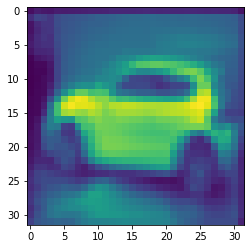

In [ ]:
plt.imshow(out[0, 0, :, :].detach().numpy())
plt.show()

In [ ]:
class FirstCNN_v2(nn.Module):

  def __init__(self):

    super(FirstCNN_v2, self).__init__()
    self.model = nn.Sequential(
        nn.Conv2d(3, 8, 3),
        nn.Conv2d(8, 16, 3)
    )
  
  def forward(self, x):

    x  = self.model(x)
    return x

In [ ]:
net = FirstCNN_v2()

In [ ]:

out = net(images)
print(out.shape)

torch.Size([4, 16, 28, 28])


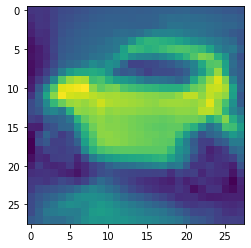

In [ ]:
plt.imshow(out[0, 0, :, :].detach().numpy())

In [ ]:
class FirstCNN_v3(nn.Module):

  def __init__(self):

    super(FirstCNN_v3, self).__init__()
    self.model = nn.Sequential(
        nn.Conv2d(3, 8, 3),
        nn.AvgPool2d(2, stride = 2),
        nn.Conv2d(8, 16, 3),
        nn.AvgPool2d(2, stride = 2)
    )
  
  def forward(self, x):

    x  = self.model(x)
    return x

In [ ]:
net = FirstCNN_v3()
out = net(images)
print(out.shape)

torch.Size([4, 16, 6, 6])


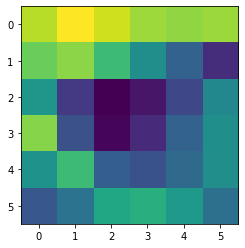

In [ ]:
plt.imshow(out[0, 0, :, :].detach().numpy())

In [ ]:
import torch.nn as nn
class LeNet(nn.Module):

  def __init__(self):
    super(LeNet, self).__init__()
    self.cnn_model = nn.Sequential(
        nn.Conv2d(3, 6, 5),
        nn.Tanh(),
        nn.AvgPool2d(2, stride = 2),
        nn.Conv2d(6, 16, 5),
        nn.Tanh(),
        nn.AvgPool2d(2, stride = 2)
    )
    self.fc_model = nn.Sequential(
        nn.Linear(400, 120),
        nn.Tanh(), 
        nn.Linear(120, 84),
        nn.Tanh(),
        nn.Linear(84, 10)
    )

  def forward(self, x):
    #print(x.shape)
    x = self.cnn_model(x)
    #print(x.shape)
    x = x.view(x.size(0), -1)
    #print(x.shape)
    x = self.fc_model(x)
    #print(x.shape)
    return x

In [ ]:
net = LeNet()
out = net(images)

In [ ]:
print(out.shape)
print(out)


torch.Size([128, 10])
tensor([[-0.0414, -0.0553, -0.0947,  ..., -0.0267, -0.0076, -0.1224],
        [-0.0428, -0.0428, -0.1058,  ..., -0.0286, -0.0149, -0.1412],
        [-0.0347, -0.0323, -0.1202,  ..., -0.0442, -0.0531, -0.1071],
        ...,
        [-0.0432, -0.0424, -0.0983,  ..., -0.0251, -0.0052, -0.1343],
        [-0.0265, -0.0578, -0.0888,  ..., -0.0203, -0.0140, -0.1287],
        [-0.0271, -0.0528, -0.0886,  ..., -0.0298, -0.0122, -0.1361]],
       grad_fn=<AddmmBackward>)


In [ ]:
max_values, pred_values = torch.max(out.data, 1)
print(pred_values)

tensor([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
        5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
        5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
        5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
        5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
        5, 5, 5, 5, 5, 5, 5, 5])


In [ ]:
batch_size = 128
trainset = torchvision.datasets.CIFAR10(root = './data', train = True, download = True, transform = transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size = batch_size, shuffle = True)
testset = torchvision.datasets.CIFAR10(root = './data', train = False, download= True, transform= transforms.ToTensor())
testloader = torch.utils.data.DataLoader(testset, batch_size= batch_size, shuffle= False) 

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
def evaluation(dataloader):
  total, correct = 0, 0
  for data in dataloader:
    inputs, labels = data
    outputs = net(inputs)
    _, pred = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (pred  == labels).sum().item()
  return 100* correct / total 

In [ ]:
net = LeNet()

In [ ]:
import torch.optim as optim

In [ ]:
loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters())

In [ ]:
net = LeNet()

Epoch 0 16, Test Accu:10.00, Train Accu:10.00
Epoch 1 16, Test Accu:10.00, Train Accu:10.00
Epoch 2 16, Test Accu:10.00, Train Accu:10.00
Epoch 3 16, Test Accu:10.00, Train Accu:10.00
Epoch 4 16, Test Accu:10.00, Train Accu:10.00
Epoch 5 16, Test Accu:10.00, Train Accu:10.00
Epoch 6 16, Test Accu:10.00, Train Accu:10.00
Epoch 7 16, Test Accu:10.00, Train Accu:10.00
Epoch 8 16, Test Accu:10.00, Train Accu:10.00
Epoch 9 16, Test Accu:10.00, Train Accu:10.00
Epoch 10 16, Test Accu:10.00, Train Accu:10.00
Epoch 11 16, Test Accu:10.00, Train Accu:10.00
Epoch 12 16, Test Accu:10.00, Train Accu:10.00
Epoch 13 16, Test Accu:10.00, Train Accu:10.00
Epoch 14 16, Test Accu:10.00, Train Accu:10.00
Epoch 15 16, Test Accu:10.00, Train Accu:10.00


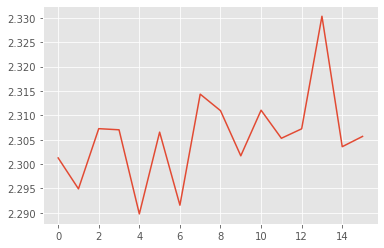

CPU times: user 7min 39s, sys: 4.49 s, total: 7min 43s
Wall time: 7min 44s


In [ ]:
%%time
loss_arr = []
loss_epoch_arr = []
max_epochs = 16

for epoch in range(max_epochs):
  for i, data in enumerate(trainloader, 0):
    inputs, labels = data

    opt.zero_grad()
    outputs = net(inputs)
    loss = loss_fn(outputs, labels)
    loss.backward()
    opt.step()

    loss_arr.append(loss.item())

  loss_epoch_arr.append(loss.item())
  print('Epoch %d /%d, Test Accu:%0.2f, Train Accu:%0.2f' % (epoch, max_epochs, evaluation(testloader), evaluation(trainloader)))

plt.style.use('ggplot')
plt.plot(loss_epoch_arr)
plt.show()

In [ ]:
import torch
device = torch.device('cuda:0' if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [ ]:
def evaluation(dataloader):
  total, correct = 0, 0
  for data in dataloader:
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    outputs = net(inputs)
    
    _, pred = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (pred  == labels).sum().item()
  return 100* correct / total 

In [ ]:
import torch.optim as optim
net = LeNet().to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters())


In [ ]:
%%time 

max_epochs = 16

for epochs in range(max_epochs):
  for i, data in enumerate(trainloader):
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    opt.zero_grad()

    outputs = net(inputs)
    loss = loss_fn(outputs, labels)
    loss.backward()
    opt.step()

  print("%d/ %d" % (epochs, max_epochs))

0/ 16
1/ 16
2/ 16
3/ 16
4/ 16
5/ 16
6/ 16
7/ 16
8/ 16
9/ 16
10/ 16
11/ 16
12/ 16
13/ 16
14/ 16
15/ 16
CPU times: user 2min 10s, sys: 1.3 s, total: 2min 11s
Wall time: 2min 11s
